## Include

In [1]:
from source.SunCalculatorI import *

## Example

In [2]:
fileIn = "samplingW.csv"
levelsAll = np.arange(0, 900, 20)
ticksMajor = np.arange(0, 1000, 200)
ticksLocs = (100, 50)
labelsFormat = '%0.f'
labelsPosE = [(4, -10), (2, -8)]
labelsPosH = [(100, 10), (120, 20), (180, 40)]

In [3]:
fileIn = "samplingEta.csv"
levelsAll = np.arange(0, 0.801, 0.01)
ticksMajor = np.arange(0, 0.801, 0.1)
ticksLocs = (0.2, 0.1)
labelsFormat = '%0.1f'
labelsPosE = [(4, -10), (2, -8)]
labelsPosH = [(240, 50), (240, 20), (275, 15)]

## Interpolator

In [4]:
sci = SunCalculatorI()
sci.read(fileIn)

In [5]:
# def heliostatField(s):
#     t = sci.findVfromH((180*degree, 30*degree))
#     n = (s + t).normalized()
#     ans = n.dot(s) #cosine
#     ans = ans**2 # interception
#     q = s.z/0.5
#     if q < 1: 
#         ans *= 2*q - q*q #shading
#     return ans

In [6]:
# for sn in sci.nodes:
#     sn.f = 0.75*heliostatField(sn.v)
# sci.updateAmplitudes()

In [7]:
ecs = sci.sampleGridE(64, 32)
xm = ecs[:,0]
ym = ecs[:,1]

def snf(sn):
    q = sci.findEfromV(sn.v)
    return [q[0], q[1], math.sqrt(abs(sn.wn))]  

sns = np.array([snf(sn) for sn in sci.nodes])

In [8]:
triang = tri.Triangulation(xm, ym)
tris = triang.triangles

temp = np.array([sci.findHfromE(ec) for ec in ecs])
azs = temp[:,0]
els = temp[:,1]

def snfH(sn):
    q = sci.findHfromV(sn.v)
    return [q[0], q[1], math.sqrt(abs(sn.wn))]  

snsH = np.array([snfH(sn) for sn in sci.nodes])

In [9]:
zm = [sci.interpolate(sci.findVfromE(ec)) for ec in ecs]

In [10]:
def addColorBar(figure, CS, aspect):
    cbar = figure.colorbar(CS, aspect=aspect)
    cbar.ax.set_xlabel(r'$\eta$', labelpad=7)
    #cbar.ax.set_xlabel(r'${\rm W}/{\rm m}^2$', labelpad=7)
    #cbar.ax.set_ylabel('$\eta$',rotation=0)

    cbar.ax.yaxis.set_major_locator(MultipleLocator(ticksLocs[0]))
    cbar.ax.yaxis.set_minor_locator(MultipleLocator(ticksLocs[1]))
    cbar.set_ticks(ticksMajor)

    cbar.ax.tick_params(which='both', direction='in', top=True, right=True, width=0.5, color=colorAxes)
    cbar.ax.tick_params(which='major', length=3)
    cbar.ax.tick_params(which='minor', length=1.5)

    cbar.outline.set_linewidth(0.5)
    for spine in cbar.ax.spines.values():
        spine.set_edgecolor(colorAxes)       
        spine.set_linewidth(0.5)
    
    return cbar

## Equatorial

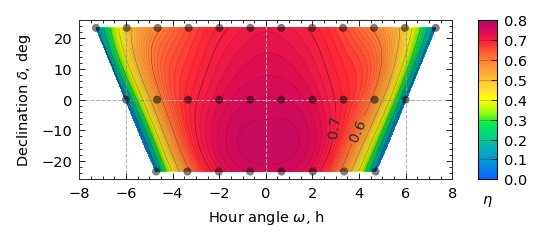

In [11]:
# figure
figure, axes = plt.subplots(constrained_layout=True)
figure.set_size_inches(3.5, 1.5)
figure.set_dpi(150)

# parts
CS = axes.tricontourf(xm/hour, ym/degree, zm, levels=levelsAll, cmap=cMapL, zorder=-2)
CS2 = axes.tricontour(xm/hour, ym/degree, zm, levels=CS.levels[::1], colors='#00000020', linewidths=0.3)
CS3 = axes.tricontour(xm/hour, ym/degree, zm, levels=CS.levels[::10], colors='#00000050', linewidths=0.3)

axes.clabel(CS3, fmt=labelsFormat, fontsize=7, colors=colorAxes, 
    manual=labelsPosE
)

axes.scatter(sns[:,0]/hour, sns[:,1]/degree, s=[15], c="#000000", alpha=0.5, edgecolors='none')
#axes.scatter(sns[:,0]/hour, sns[:,1]/degree, s=7*sns[:,2], c="#000000", alpha=0.5, edgecolors='none')

# frame
axes.set_xlabel(r'Hour angle $\omega$, h')
axes.set_xlim(-8, 8)
axes.xaxis.set_major_locator(MultipleLocator(2))
axes.xaxis.set_minor_locator(MultipleLocator(0.5))
        
axes.set_ylabel(r'Declination $\delta$, deg')
axes.set_ylim(-26, 26)
axes.yaxis.set_major_locator(MultipleLocator(10))
axes.yaxis.set_minor_locator(MultipleLocator(2))
 
axes.tick_params(which='both', direction='in', top=True, right=True, width=0.5, color=colorAxes)
axes.tick_params(which='major', length=3)
axes.tick_params(which='minor', length=1.5)

for spine in axes.spines.values():
    spine.set_edgecolor(colorAxes)       
    spine.set_linewidth(0.5)
    
for v in [-6, 0, 6]:
    axes.axvline(x=v, c=colorGrid, ls='--', lw=0.5, zorder=-1)
for v in [0]:
    axes.axhline(y=v, c=colorGrid, ls='--', lw=0.5, zorder=-1)
    
# colorbar
cbar = addColorBar(figure, CS, 20)
cbar.add_lines(CS2)
cbar.add_lines(CS3)

# show
plt.show()
fileOut = fileIn.replace(".csv",'E.pdf')
# figure.savefig(fileOut, dpi=300)

## Horizontal

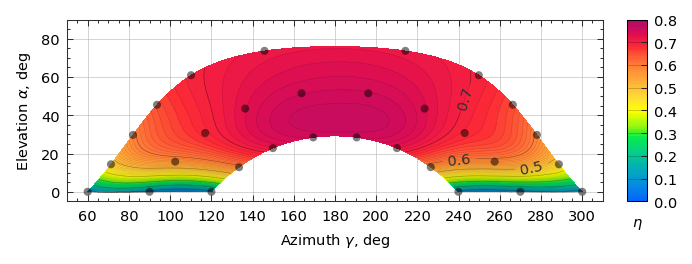

In [13]:
#figure
figure, axes = plt.subplots(constrained_layout=True)
figure.set_size_inches(4.5, 1.65)
figure.set_dpi(150)

# parts
CS = axes.tricontourf(azs/degree, els/degree, tris, zm, levels=levelsAll, cmap=cMapL, zorder=-2)
CS2 = axes.tricontour(azs/degree, els/degree, tris, zm, levels=levelsAll[::1], colors='#00000020', linewidths=0.3)
CS3 = axes.tricontour(azs/degree, els/degree, tris, zm, levels=levelsAll[::10], colors='#00000050', linewidths=0.3)

axes.clabel(CS3, fmt=labelsFormat, fontsize=7, colors=colorAxes, manual=labelsPosH)

axes.scatter(snsH[:,0]/degree, snsH[:,1]/degree, s=[15], c="#000000", alpha=0.5, edgecolors='none')

# frame
axes.set_xlabel(r'Azimuth $\gamma$, deg')
axes.set_xlim(50, 360 - 50)
axes.xaxis.set_major_locator(MultipleLocator(20))
axes.xaxis.set_minor_locator(MultipleLocator(5))
        
axes.set_ylabel(r'Elevation $\alpha$, deg')
axes.set_ylim(-5, 90)
axes.yaxis.set_major_locator(MultipleLocator(20))
axes.yaxis.set_minor_locator(MultipleLocator(5))
 
axes.tick_params(which='both', direction='in', top=True, right=True, width=0.5, color=colorAxes)
axes.tick_params(which='major', length=3)
axes.tick_params(which='minor', length=1.5)

for spine in axes.spines.values():
    spine.set_edgecolor(colorAxes)       
    spine.set_linewidth(0.5)
    
colorD = '#B0B0B0FF'
for v in np.arange(20, 360, 20):
    axes.axvline(x=v, c=colorD, ls='-', lw=0.25, zorder=-5)
for v in np.arange(0, 90, 20):
    axes.axhline(y=v, c=colorD, ls='-', lw=0.25, zorder=-5)    
    
# colorbar
cbar = addColorBar(figure, CS, 25)
cbar.add_lines(CS2)
cbar.add_lines(CS3)

# show
plt.show()
fileOut = fileIn.replace(".csv",'H.png')
figure.savefig(fileOut, dpi=300)